# 2x2 Repeated-Measures ANOVA

In [1]:
# Dace Apšvalka, 2020, www.dcdace.net
# ----------------------------------------------------------------------
# LIBRARIES
# ----------------------------------------------------------------------
shhh <- suppressPackageStartupMessages # It's a library, so shhh!

shhh(suppressWarnings(library(Rmisc)))     # for getting summary data frame
shhh(suppressWarnings(library(ggpubr)))    # For Quantile-Quantile plot
shhh(suppressWarnings(library(ggplot2)))   # for plotting results
shhh(suppressWarnings(library(cowplot)))   # for adding plots together and setting different widths
shhh(suppressWarnings(library(gtools)))    # for converting pvalues to stars
shhh(suppressWarnings(library(rstatix)))   # for pairwise ttest
shhh(suppressWarnings(library(psycho)))    # to get the Emotion dataset for the example

## Using rm_2by2_anova function

### Load the function

In [2]:
source("https://raw.githubusercontent.com/dcdace/R_functions/main/rm_2by2_anova.R")

### Load example data

In [3]:
# ----------------------------------------------------------------------
# Get the data
# ----------------------------------------------------------------------
# As an example I use Emotion dataset from psycho package, https://github.com/neuropsychology/psycho.R

# Get the dataset
dataset <- psycho::emotion

# See how it looks
head(dataset)

,Participant_ID,Participant_Age,Participant_Sex,Item_Category,Item_Name,Trial_Order,Emotion_Condition,Subjective_Arousal,Subjective_Valence,Autobiographical_Link,Recall
,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<lgl>
1,1S,18.38467,Female,People,People_158_h,1,Neutral,12.239583,0.5208333,63.281250,TRUE
2,1S,18.38467,Female,Faces,Faces_045_h,2,Neutral,16.406250,4.1666667,22.135417,FALSE
3,1S,18.38467,Female,People,People_138_h,3,Neutral,25.520833,25.5208333,55.989583,TRUE
4,1S,18.38467,Female,People,People_148_h,4,Neutral,0.000000,0.0000000,44.791667,FALSE
5,1S,18.38467,Female,Faces,Faces_315_h,5,Neutral,25.781250,45.8333333,30.208333,FALSE
6,1S,18.38467,Female,Faces,Faces_224_h,6,Neutral,2.604167,0.0000000,8.072917,FALSE


### Input data for the function

In [4]:
# ----------------------------------------------------------------------
# Specify items and parameters
# ----------------------------------------------------------------------

# From the dataset, specify subject ID, Dependent Variable, and 2 within-subject Factors 
columns <- list(
  sID = "Participant_ID",
  DV  = "Subjective_Valence",
  Fc1 = "Item_Category",
  Fc2 = "Emotion_Condition"
)
# Define plot label names, tilte and colors
param <- list(
  y.label    = "Subjective Valence",
  Fc1.label  = "Item",
  Fc2.label  = "Emotion",
  cat.color  = c('#DF4A56', '#5284a8')
)
# the plot title
param$title <- sprintf('%s x %s interaction', param$Fc2.label, param$Fc1.label)

### Run the function

The function will output several result summaries. And it will also return a list of result variables including assumption plot (boxplots & QQ plot) and the interaction plot. 

In [5]:
results <- rm_2by2_anova(dataset, columns, param)
#res$plot.assumption.checks


CHECK ASSUMPTIONS

 Outliers

# A tibble: 4 x 6
  Fc1    Fc2      sID   meanDV is.outlier is.extreme
  <fct>  <fct>    <fct>  <dbl> <lgl>      <lgl>     
1 Faces  Negative 17S    -1.91 TRUE       FALSE     
2 Faces  Neutral  9S     50.5  TRUE       FALSE     
3 People Negative 17S    -1.17 TRUE       TRUE      
4 People Negative 9S    -25.8  TRUE       FALSE     

Data has extreme outliers!

-----------------------------------------------
 Normality 

# A tibble: 4 x 5
  Fc1    Fc2      variable statistic       p
  <fct>  <fct>    <chr>        <dbl>   <dbl>
1 Faces  Negative meanDV       0.928 0.159  
2 Faces  Neutral  meanDV       0.926 0.145  
3 People Negative meanDV       0.833 0.00364
4 People Neutral  meanDV       0.947 0.351  

Not all levels are normaly distributed!


SUMMARY DESCRIPTIVES

     Fc1      Fc2  N    meanDV       sd       se       ci
1  Faces Negative 19 -52.75116 14.77499 3.389615 7.121317
2  Faces  Neutral 19  17.62804 11.73257 2.691635 5.654916
3 People Negativ

### Assumption check plots

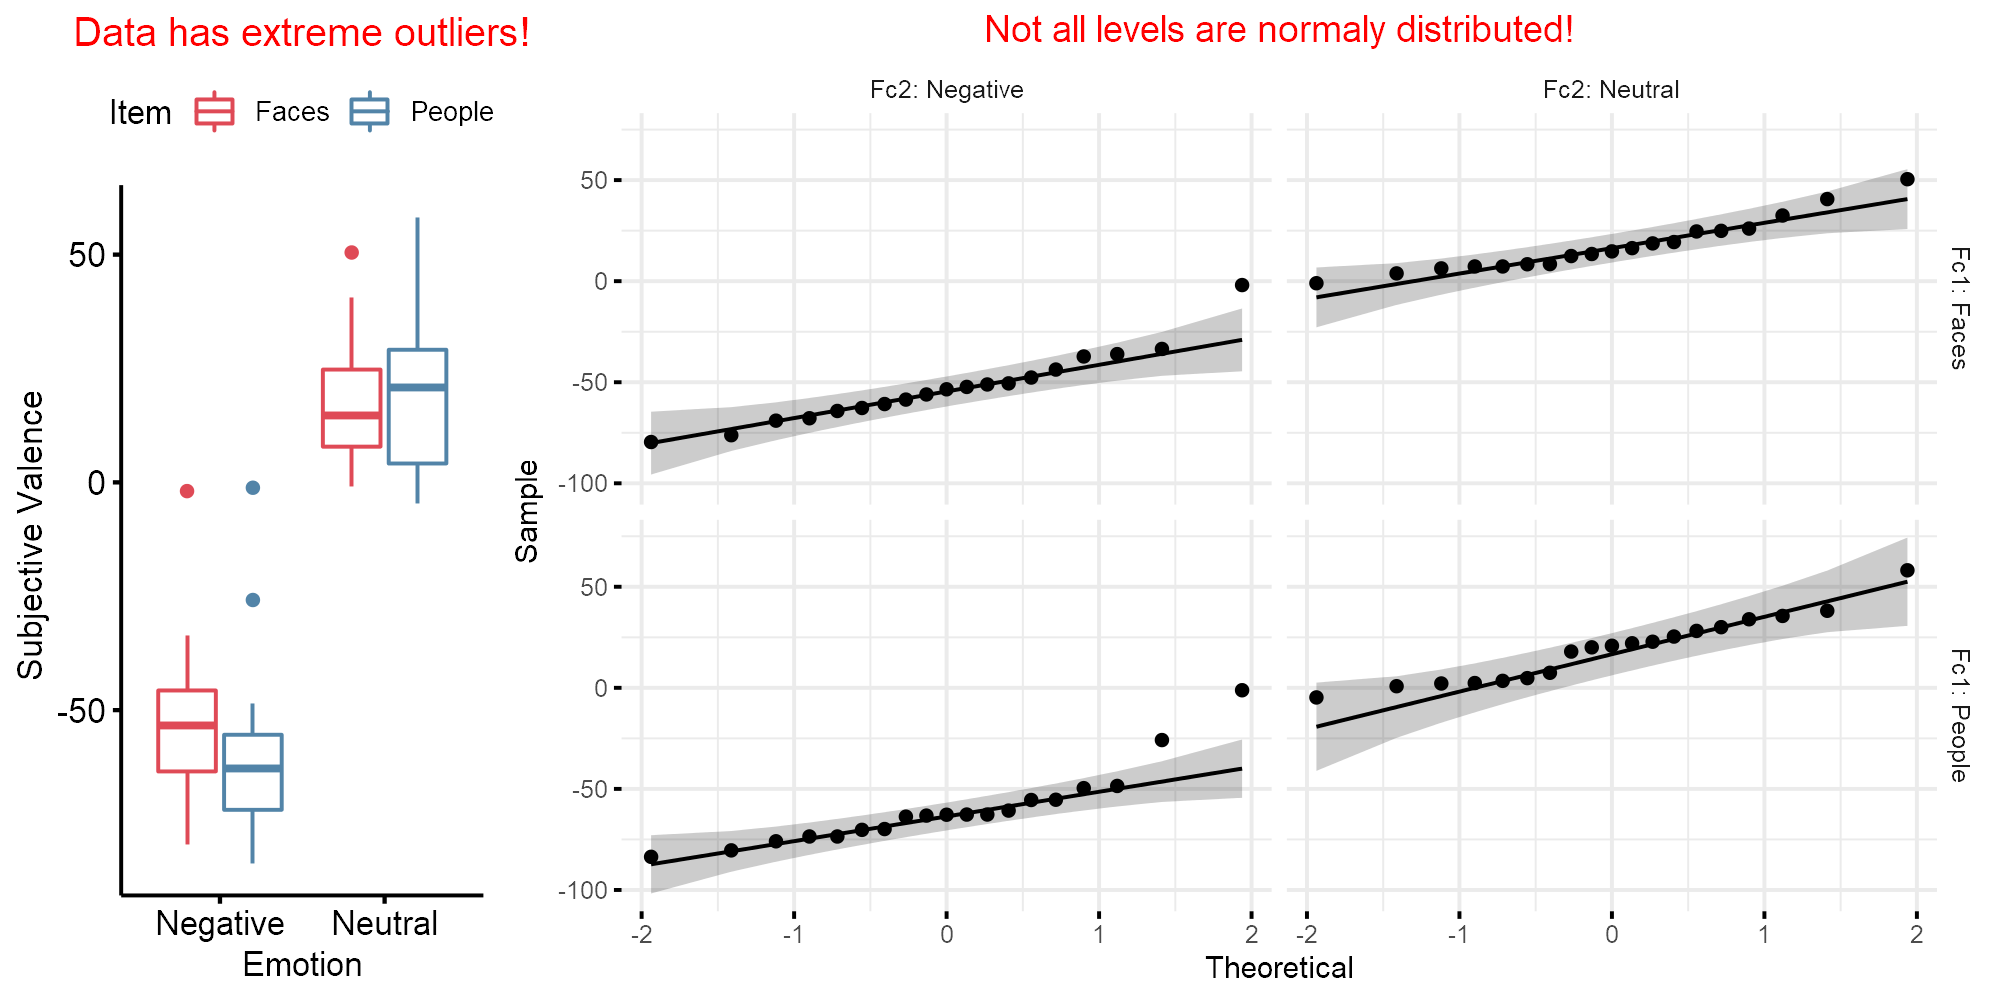

In [6]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200) # change plot size

results$plot.assumption.checks

### Results plot

Error bars in the plot are within-subject 95% CIs.

#### Basic plot

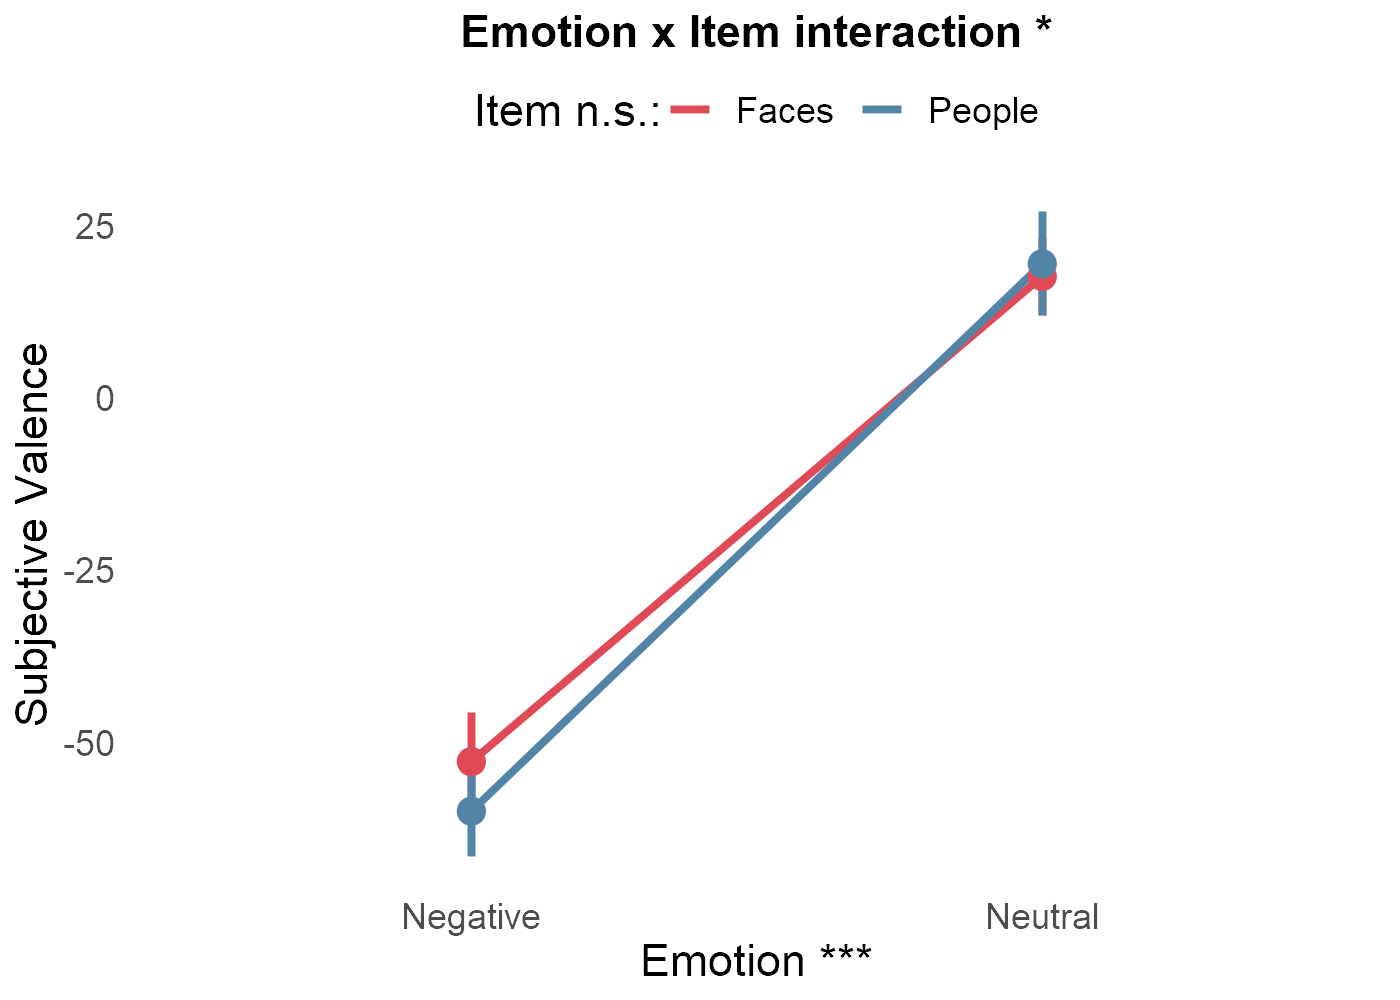

In [7]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200) # change plot size
results$plot.anova

#### Add some extra stuff to the plot

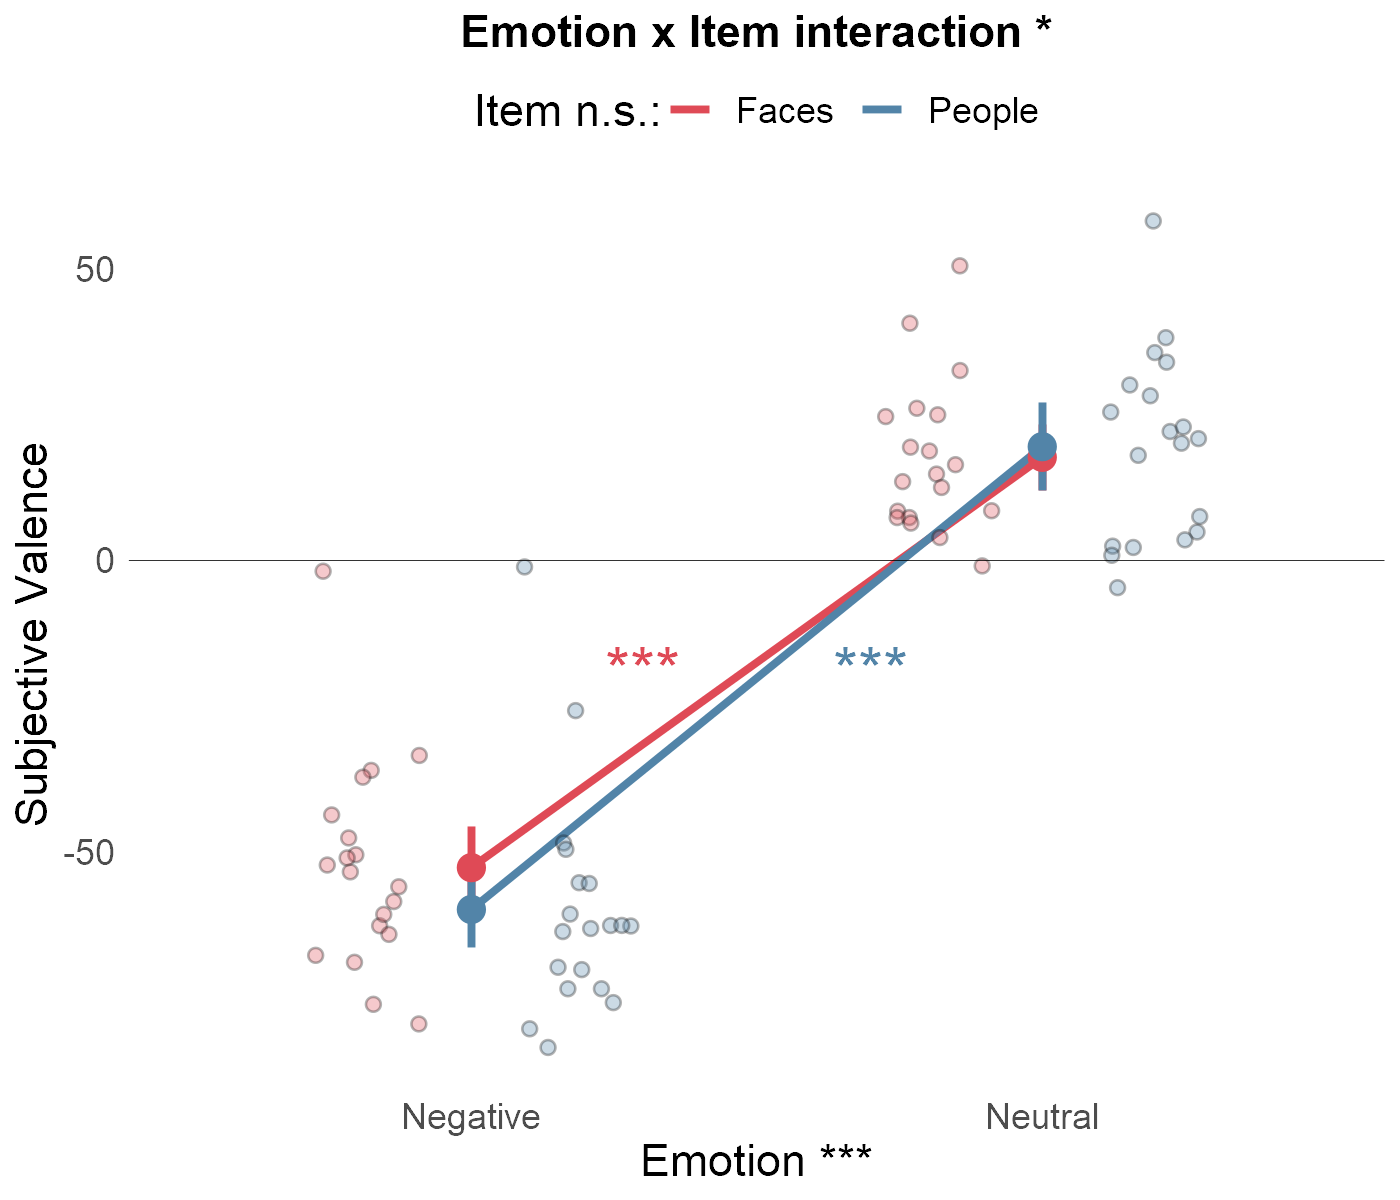

In [8]:
options(repr.plot.width = 7, repr.plot.height = 6, repr.plot.res = 200) # change plot size
# Adding post-hoc comparison stars
# Prepare the values

# post-hoc pairwise comparisons for each Fc1 level between the Fc2 levels
p.Fc1.L1 <-
  ifelse(results$pwc1$p[1] < 0.05, stars.pval(results$pwc1$p[1]), "n.s.")
p.Fc1.L2 <-
  ifelse(results$pwc1$p[2] < 0.05, stars.pval(results$pwc1$p[2]), "n.s.")

results$plot.anova +
  
  # Add post-hoc pairwise comparisons
  # might need to adjust the x and y positions
  annotate(
    "text",
    x = 1.30,
    y = mean(results$dataSummary$meanDV),
    label = p.Fc1.L1,
    color = param$cat.color[1],
    size = 8
  ) +
  annotate(
    "text",
    x = 1.7,
    y = mean(results$dataSummary$meanDV),
    label = p.Fc1.L2,
    color = param$cat.color[2],
    size = 8
  ) +
  
  # add individual datapoints
  geom_point(
    colour = "black",
    alpha = .3,
    aes(fill = Fc1),
    size = 2,
    stroke = 0.5,
    shape = 21,
    position = position_jitterdodge(),
    show.legend = FALSE
  ) +
  
  # add horizontal line at 0
  geom_hline(aes(yintercept = 0), size = 0.1)

## Step-by-step

Here the above function elements are executed ste-by-step (the function itself is not required). 

### Specify parameters

In [9]:
# ----------------------------------------------------------------------
# Specify items and parameters
# ----------------------------------------------------------------------

# From the dataset, specify subject ID, Dependent Variable, and 2 within-subject Factors 
columns <- list(
  sID = "Participant_ID",
  DV  = "Subjective_Valence",
  Fc1 = "Item_Category",
  Fc2 = "Emotion_Condition"
)
# Define plot label names, tilte and colors
param <- list(
  y.label    = "Subjective Valence",
  Fc1.label  = "Item",
  Fc2.label  = "Emotion",
  cat.color  = c('#DF4A56', '#5284a8')
)
# the plot title
param$title <- sprintf('%s x %s interaction', param$Fc2.label, param$Fc1.label)

### Prepare the dataset

In [10]:
# ----------------------------------------------------------------------
# Prepare the working dataset
# ----------------------------------------------------------------------
# Subset the dataset to only the columns of interest
data_subset <- dataset %>% select(all_of(unlist(columns)))

# Average same Factor/Level values for each subject if there are several. 
# Will use this data frame df for the rest of the results and plots
df <- ddply(data_subset, .(sID, Fc1, Fc2), 
             summarise, meanDV = mean(DV, na.rm = TRUE))

# See how it looks
head(df)

,sID,Fc1,Fc2,meanDV
,<fct>,<fct>,<fct>,<dbl>
1,10S,Faces,Negative,-53.472222
2,10S,Faces,Neutral,32.508681
3,10S,People,Negative,-62.673611
4,10S,People,Neutral,20.833333
5,11S,Faces,Negative,-76.189605
6,11S,Faces,Neutral,8.388238


### Check assumptions

#### Outliers

In [11]:
# ----------------------------------------------------------------------
# Check for outliers
# ----------------------------------------------------------------------
# Identify if there are extreme outliers
check.outliers <- df %>%
  group_by(Fc1, Fc2) %>%
  identify_outliers(meanDV)

# Display
check.outliers

# Outlier result text
outlier.result.txt <- ifelse(any(check.outliers$is.extreme == T), 
       "Data has extreme outliers!",
       "There are no extreme outliers.")
cat('================================================\n\n')
cat(outlier.result.txt)
cat('\n\n================================================')

# Boxplot title color. It will be red if there are ouliers!
outlier.title.color <- ifelse(any(check.outliers$is.extreme == T), 
       "red",
       "black")

# Create a boxplot
plot.box <- ggboxplot(
  df, x = "Fc2", y = "meanDV",
  color = "Fc1", 
  title = outlier.result.txt, 
  ylab = param$y.label, 
  xlab = param$Fc2.label
  ) +
guides(color = guide_legend(param$Fc1.label)) +
scale_color_manual(values = param$cat.color) +
theme(plot.title = element_text(hjust = 0.5, color = outlier.title.color)) 


Fc1,Fc2,sID,meanDV,is.outlier,is.extreme
<fct>,<fct>,<fct>,<dbl>,<lgl>,<lgl>
Faces,Negative,17S,-1.909722,TRUE,FALSE
Faces,Neutral,9S,50.469741,TRUE,FALSE
People,Negative,17S,-1.171875,TRUE,TRUE
People,Negative,9S,-25.817472,TRUE,FALSE



Data has extreme outliers!


#### Normality

In [12]:
# ----------------------------------------------------------------------
# Check normality assumption
# ----------------------------------------------------------------------
# Shapiro-Wilk’s test (should be > .05)
check.normality <- df %>% 
  group_by(Fc1, Fc2) %>% 
  shapiro_test(meanDV)

# Display
check.normality

# Normality result text
normality.result.txt <- ifelse(any(check.normality$p < 0.05), 
       "Not all levels are normaly distributed!", 
       "All levels are normally distributed.")
cat('================================================\n\n')
cat(normality.result.txt)
cat('\n\n================================================')

# QQ plot title color. It will be red if not all levels meet normality!
normality.title.color <- ifelse(any(check.normality$p < 0.05), 
       "red",
       "black")

# Create Quantile-Quantile plots
plot.qq <- ggqqplot(df, "meanDV", ggtheme = theme_minimal(), title = normality.result.txt) +
  facet_grid(Fc1 ~ Fc2, labeller = "label_both") + 
  theme(plot.title = element_text(hjust = 0.5, color = normality.title.color))  

Fc1,Fc2,variable,statistic,p
<fct>,<fct>,<chr>,<dbl>,<dbl>
Faces,Negative,meanDV,0.9279360,0.158654565
Faces,Neutral,meanDV,0.9258916,0.145440020
People,Negative,meanDV,0.8333678,0.003640378
People,Neutral,meanDV,0.9469856,0.350725108



Not all levels are normaly distributed!


#### Boxplot and QQ plots

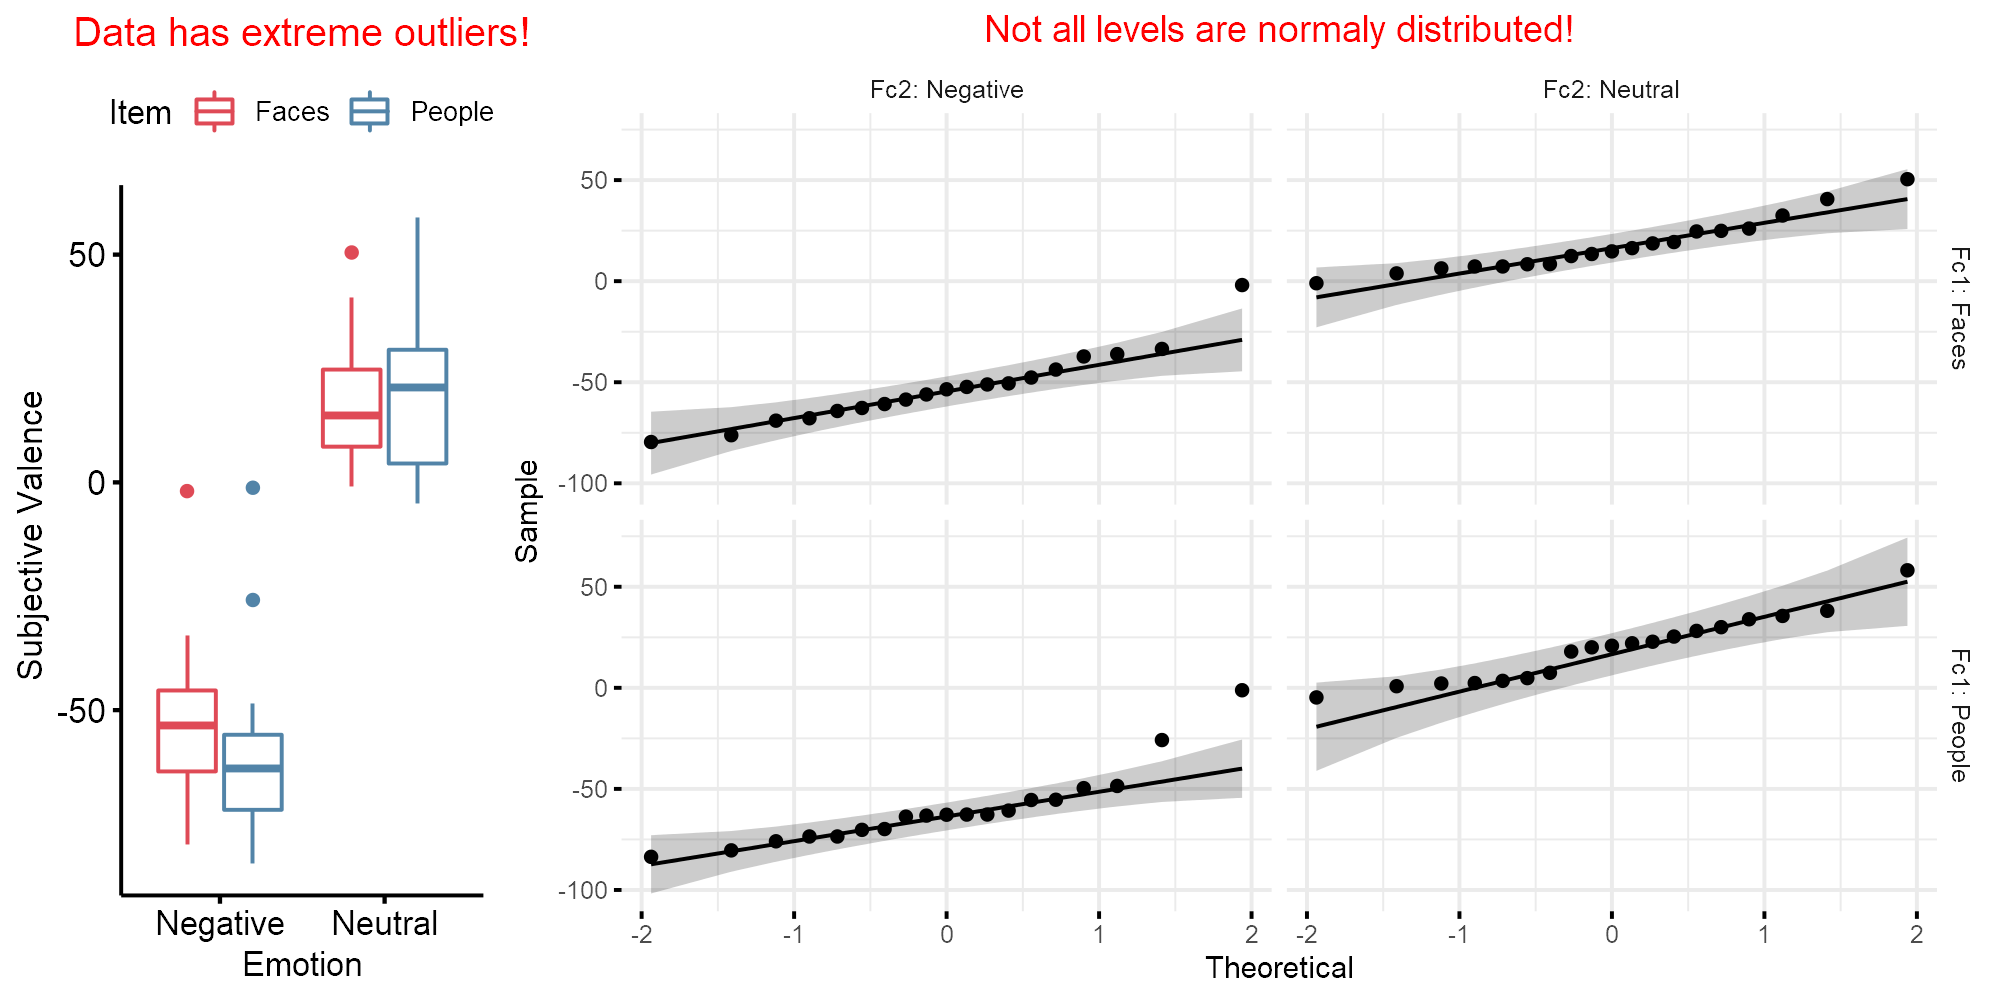

In [13]:
# ----------------------------------------------------------------------
# PLOT Boxplot and QQ
# ----------------------------------------------------------------------
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200) # change plot size

# Add result texts as titles for each plot
plot_grid(plot.box, plot.qq, nrow = 1, rel_widths = c(1/4,3/4))

### Descriptive summary

In [14]:
# ----------------------------------------------------------------------
# Within-Subject descriptive summary
# ----------------------------------------------------------------------
# Get the within-subject summary. Will need this to plot within-subject error bars.
# Using summarySEwithin function from the Rmisc package 

dataSummary <- summarySEwithin(
  df,
  measurevar = "meanDV",
  withinvars = c("Fc1", "Fc2"),
  idvar = "sID",
  na.rm = TRUE,
  conf.interval = 0.95
)
# See how it looks
dataSummary

Fc1,Fc2,N,meanDV,sd,se,ci
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Faces,Negative,19,-52.75116,14.77499,3.389615,7.121317
Faces,Neutral,19,17.62804,11.73257,2.691635,5.654916
People,Negative,19,-59.92947,13.65515,3.132706,6.581571
People,Neutral,19,19.45238,15.63017,3.585806,7.533500


### 2 x 2 ANOVA results

#### 2-way interaction

In [15]:
# ----------------------------------------------------------------------
# Factor 1 X Factor 2 interaction, ANOVA
# ----------------------------------------------------------------------
# Within-subject repeated measures ANOVA
res.anova <- aov(meanDV ~ Fc1 * Fc2 + Error(sID / Fc1 * Fc2),
                 data = df)
#Summary results
summary.anova <- summary(res.anova)

# save p-val, will need it to put on the plot
res.anova.pval <-
  summary.anova[["Error: sID:Fc1:Fc2"]][[1]][["Pr(>F)"]][1]

# Display result string
sign.anova <-
  ifelse(res.anova.pval < 0.05, "Significant", "No significant")

res.txt.anova <- sprintf(
  '%s %s: F(%d,%d) = %.2f, p = %.3f',
  sign.anova,
  param$title,
  summary.anova[["Error: sID:Fc1:Fc2"]][[1]][["Df"]][1],
  summary.anova[["Error: sID:Fc1:Fc2"]][[1]][["Df"]][2],
  summary.anova[["Error: sID:Fc1:Fc2"]][[1]][["F value"]][1],
  res.anova.pval
)
cat('\n================================================\n\n')
cat(res.txt.anova)
cat('\n\n================================================')



Significant Emotion x Item interaction: F(1,18) = 5.83, p = 0.027


#### Main Effects

In [16]:
# ----------------------------------------------------------------------
# Simple Main Effects of both factors
# ----------------------------------------------------------------------
cat('\n================================================\n')
# Main Effect of Factor 1
one.way1 <- anova_test(
        data = df,
        dv = meanDV,
        wid = sID,
        within = Fc1,
        effect.size = "ges") 

sign.Fc1 <- ifelse(one.way1$p < 0.05, "Significant", "No significant")

# display the result sentence
cat(sprintf('%s main effect of %s on %s \n\n', sign.Fc1, columns$Fc1, columns$DV))
# display th result table
print(one.way1)

cat('\n================================================\n')

# Main Effect of Factor 2
one.way2 <- anova_test(
        data = df,
        dv = meanDV,
        wid = sID,
        within = Fc2,
        effect.size = "ges") 

sign.Fc2 <- ifelse(one.way2$p < 0.05, "Significant", "No significant")

cat(sprintf('%s main effect of %s on %s \n\n', sign.Fc2, columns$Fc2, columns$DV))
print(one.way2)
cat('\n================================================')


No significant main effect of Item_Category on Subjective_Valence 

ANOVA Table (type III tests)

  Effect DFn DFd    F     p p<.05   ges
1    Fc1   1  37 1.57 0.218       0.001

Significant main effect of Emotion_Condition on Subjective_Valence 

ANOVA Table (type III tests)

  Effect DFn DFd       F       p p<.05   ges
1    Fc2   1  37 420.632 8.4e-22     * 0.837


#### Main Effect of Factor 2

In [17]:
# Main Effect of Factor 2
one.way2 <- anova_test(
        data = df,
        dv = meanDV,
        wid = sID,
        within = Fc2,
        effect.size = "ges") 

sign.Fc2 <- ifelse(one.way2$p < 0.05, "Significant", "Not significant")

sprintf('%s main effect of %s on %s', sign.Fc2, columns$Fc2, columns$DV)
print(one.way2)

[1] "Significant main effect of Emotion_Condition on Subjective_Valence"

ANOVA Table (type III tests)

  Effect DFn DFd       F       p p<.05   ges
1    Fc2   1  37 420.632 8.4e-22     * 0.837


### Post-hoc tests

In [18]:
# Pairwise comparisons grouped by Factor 1
pwc1 <- df %>%
  group_by(Fc1) %>%
  pairwise_t_test(
    meanDV ~ Fc2, paired = TRUE
  )
pwc1

,Fc1,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Faces,meanDV,Negative,Neutral,19,19,-14.57339,18,2.09e-11,2.09e-11,****
2,People,meanDV,Negative,Neutral,19,19,-14.68316,18,1.84e-11,1.84e-11,****


In [19]:
# Pairwise comparisons grouped by Factor 2
pwc2 <- df %>%
  group_by(Fc2) %>%
  pairwise_t_test(
    meanDV ~ Fc1, paired = TRUE
  )
pwc2

,Fc2,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Negative,meanDV,Faces,People,19,19,2.3724765,18,0.029,0.029,*
2,Neutral,meanDV,Faces,People,19,19,-0.6727361,18,0.510,0.510,ns


### Plot the results

#### Preparing titles and annotations

In [20]:
# ----------------------------------------------------------------------
# P-values for displaying significance stars
# ----------------------------------------------------------------------
# 2x2 interaction result
p.anova <- ifelse(res.anova.pval < 0.05, stars.pval(res.anova.pval), "n.s.")
# Main effects
p.mainFc1 <- ifelse(one.way1$p < 0.05, stars.pval(one.way1$p), "n.s.")
p.mainFc2 <- ifelse(one.way2$p < 0.05, stars.pval(one.way2$p), "n.s.")

# post-hoc pairwise comparisons for each Fc1 level between the Fc2 levels
p.Fc1.L1 <- ifelse(pwc1$p[1] < 0.05, stars.pval(pwc1$p[1]), "n.s.")
p.Fc1.L2 <- ifelse(pwc1$p[2] < 0.05, stars.pval(pwc1$p[2]), "n.s.")

# plot main title and factor labels (with added significance stars)
plot.title <- sprintf('%s %s', param$title, p.anova)
Fc1.title <- sprintf('%s %s:', param$Fc1.label, p.mainFc1)
Fc2.title <- sprintf('%s %s', param$Fc2.label, p.mainFc2)

#### The plotting function

In [21]:
# ----------------------------------------------------------------------
# Plot the interaction results
# ----------------------------------------------------------------------
plot.anova <-
  ggplot(data = df,
         aes(
           x = Fc2,
           y = meanDV,
           group = Fc1,
           color = Fc1
         )) +
  # connect the level means with a line
  stat_summary(fun = mean, geom = "line", size = 1) +
  
  # add mean point and within-subject CI (taken from dataSummary created above)
  geom_pointrange(
    data = dataSummary,
    aes(
      y = meanDV,
      ymin = meanDV - ci,
      ymax = meanDV + ci,
      color = Fc1
    ),
    size = 1,
    stroke = 0.5,
    show.legend = FALSE
  ) +
  
  # change the default colors to the defined ones
  scale_color_manual(values = param$cat.color) +
  scale_fill_manual(values = param$cat.color) +
  
  # add labels and the title
  guides(color = guide_legend(Fc1.title)) +
  labs(x = Fc2.title, y = param$y.label) +
  ggtitle(plot.title) +
  
  # make it nicer
  theme_minimal() +
  theme(
    text = element_text(size = 20),
    plot.title = element_text(hjust = 0.5,
                              size = 20,
                              face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.position = "top"
  )

#### Add additional items to the plot and display the plot

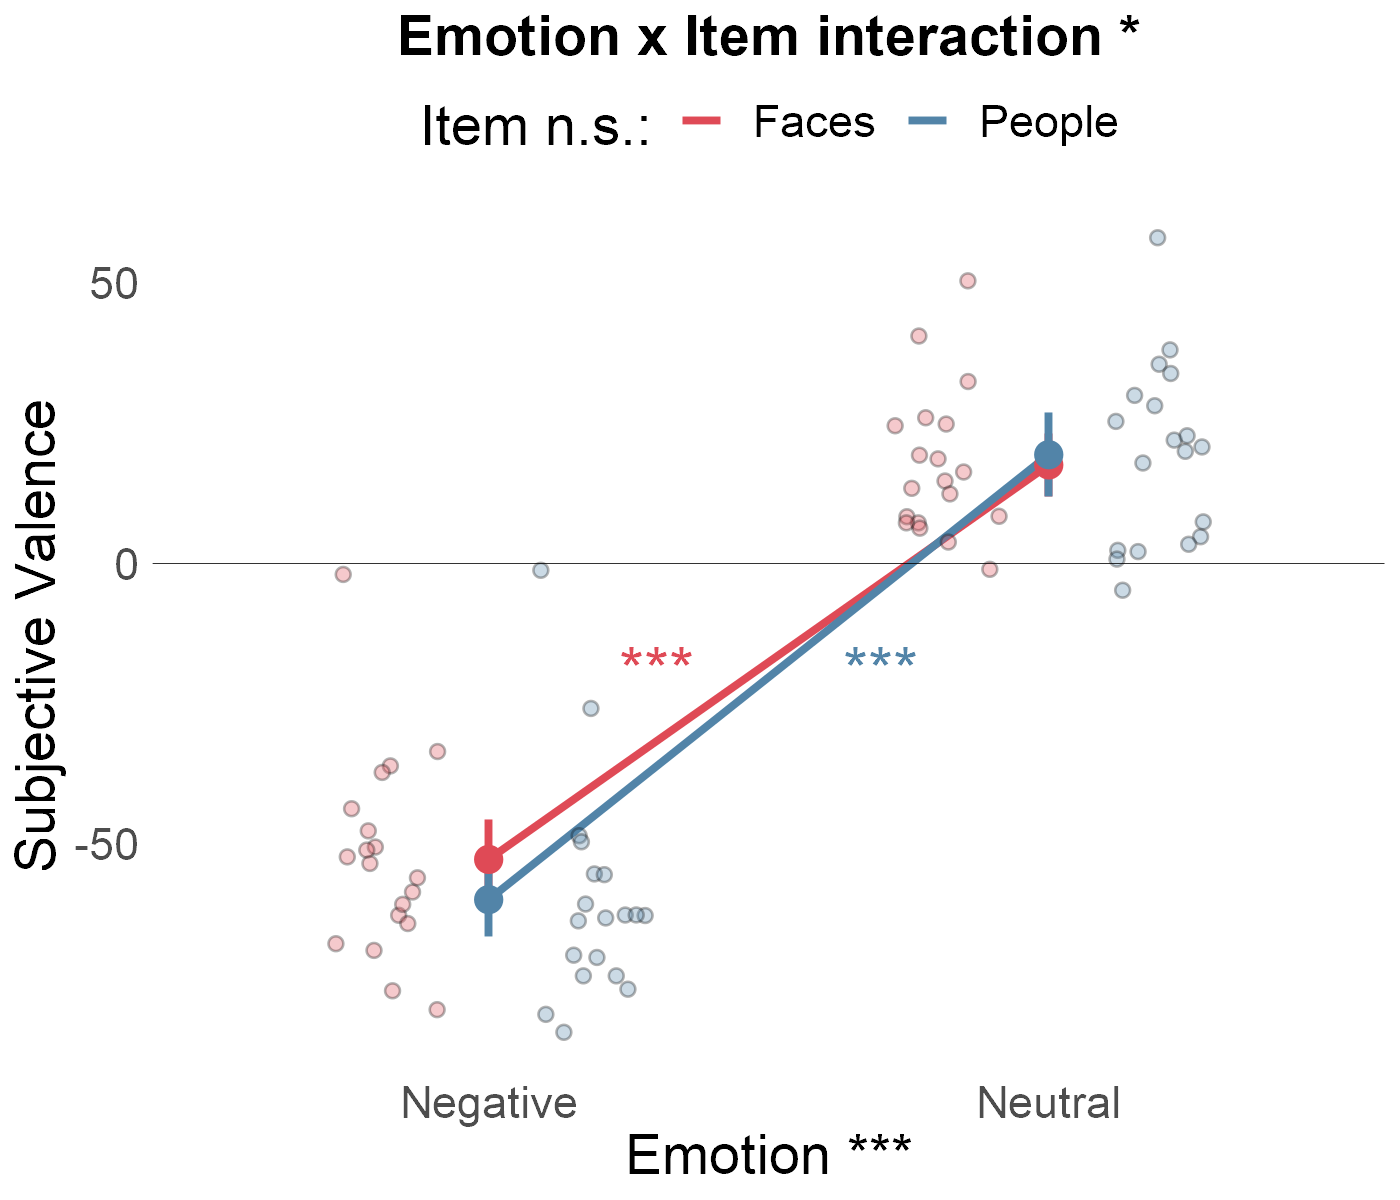

In [22]:
options(repr.plot.width = 7, repr.plot.height = 6) # change plot size

# ----------------------------------------------------------------------
# Add extra stuff to the plot
# ----------------------------------------------------------------------
plot.anova + 

# add post-hoc pairwise comparisons
# might need to adjust the x and y positions
  annotate(
    "text", x = 1.30, y = mean(dataSummary$meanDV),
    label = p.Fc1.L1, color = param$cat.color[1], size = 8
  ) +
  annotate(
    "text", x = 1.7, y = mean(dataSummary$meanDV),
    label = p.Fc1.L2, color = param$cat.color[2], size = 8
  )  +

# add individual datapoints
geom_point(
    colour = "black", alpha = .3,
    aes(fill = Fc1),
    size = 2, stroke = 0.5, shape = 21,
    position = position_jitterdodge(),
    show.legend = FALSE
  ) +

# add horizontal line at 0
    geom_hline(aes(yintercept = 0), size = 0.1) 

# Use the function on another dataset

Here I am testing the rm_2by2_anova function on another dataset. The dataset is from https://ademos.people.uic.edu/Chapter21.html.
The background of the dataset is as follows: 
> This fake data is a sample of 30 adults. All subjects were shown a
> set of words. Afterwards, for some of the words they were given a
> multiple choice test, and the rest of the words they simply
> restudied. Immediately afterwards their memory was tested for all
> words to determine if there were memory differences depending on
> whether the word was tested or restudied (immediate final test). Two
> days later, subjects came back and were given the same test on all
> words again (delayed final test). The dependent variable (DV) given
> in the file are a proportion of correctly remembered items for the
> immediate and delayed test for both conditions. Therefore, if we
> want to know if there are memory difference based on time delay and
> whether the word was tested or restudied, we need to conduct a within-subjects ANOVA.

### Load the data

In [23]:
# https://ademos.people.uic.edu/Chapter21.html
# load the data
study_dataset <- read.csv("https://ademos.people.uic.edu/Chapter_21_Within_Data.csv")

# Dataset content: 
#Subject = Subject ID #
#Within_Cond = Study Method (test or restudy)
#Within_Time = Immediate or Delayed
#DV = Memory Performance

# Change the column names and levels to reflect the data content

study_dataset$Within_Cond <- factor(study_dataset$Within_Cond,
                               levels = c(1,2),
                               labels = c("Test", "Restudy"))

study_dataset$Within_Time <-factor(study_dataset$Within_Time,
                                  levels = c(1,2),
                                  labels = c("Immediate", "Delayed")) 

colnames(study_dataset)[2] <- "Study_Method"
colnames(study_dataset)[3] <- "Test_Time"
colnames(study_dataset)[4] <- "Memory_Performance"

head(study_dataset)

,Subject,Study_Method,Test_Time,Memory_Performance
,<int>,<fct>,<fct>,<dbl>
1,1,Test,Immediate,96
2,2,Test,Immediate,81
3,3,Test,Immediate,73
4,4,Test,Immediate,90
5,5,Test,Immediate,72
6,6,Test,Immediate,83


### Specify parameters

In [24]:
# ----------------------------------------------------------------------
# Specify items and parameters
# ----------------------------------------------------------------------

# From the dataset, specify subject ID, Dependent Variable, and 2 within-subject Factors 
columns <- list(
  sID = "Subject",
  DV  = "Memory_Performance",
  Fc1 = "Study_Method",
  Fc2 = "Test_Time"
)
# Define plot label names, tilte and colors
param <- list(
  y.label    = "Memory Performance",
  Fc1.label  = "Study Method",
  Fc2.label  = "Test Time",
  cat.color  = c('darkblue', 'lightgreen')
)
# the plot title
param$title <- sprintf('%s x %s interaction', param$Fc2.label, param$Fc1.label)

### Run the function

In [25]:
results <- rm_2by2_anova(study_dataset, columns, param)


CHECK ASSUMPTIONS

 Outliers

[1] Fc1        Fc2        sID        meanDV     is.outlier is.extreme
<0 rows> (or 0-length row.names)

There are no extreme outliers.

-----------------------------------------------
 Normality 

# A tibble: 4 x 5
  Fc1     Fc2       variable statistic       p
  <fct>   <fct>     <chr>        <dbl>   <dbl>
1 Test    Immediate meanDV       0.922 0.0301 
2 Test    Delayed   meanDV       0.934 0.0645 
3 Restudy Immediate meanDV       0.958 0.280  
4 Restudy Delayed   meanDV       0.871 0.00176

Not all levels are normaly distributed!


SUMMARY DESCRIPTIVES

      Fc1       Fc2  N   meanDV        sd       se       ci
1    Test Immediate 30 81.26667  9.475361 1.729956 3.538158
2    Test   Delayed 30 83.80000  9.232216 1.685564 3.447366
3 Restudy Immediate 30 83.40000  9.504108 1.735205 3.548892
4 Restudy   Delayed 30 68.30000 12.424643 2.268419 4.639438


2x2 INTERACTION RESULTS


Significant Test Time x Study Method interaction: F(1,29) = 20.17, p = 0.000




### Assumption check plots

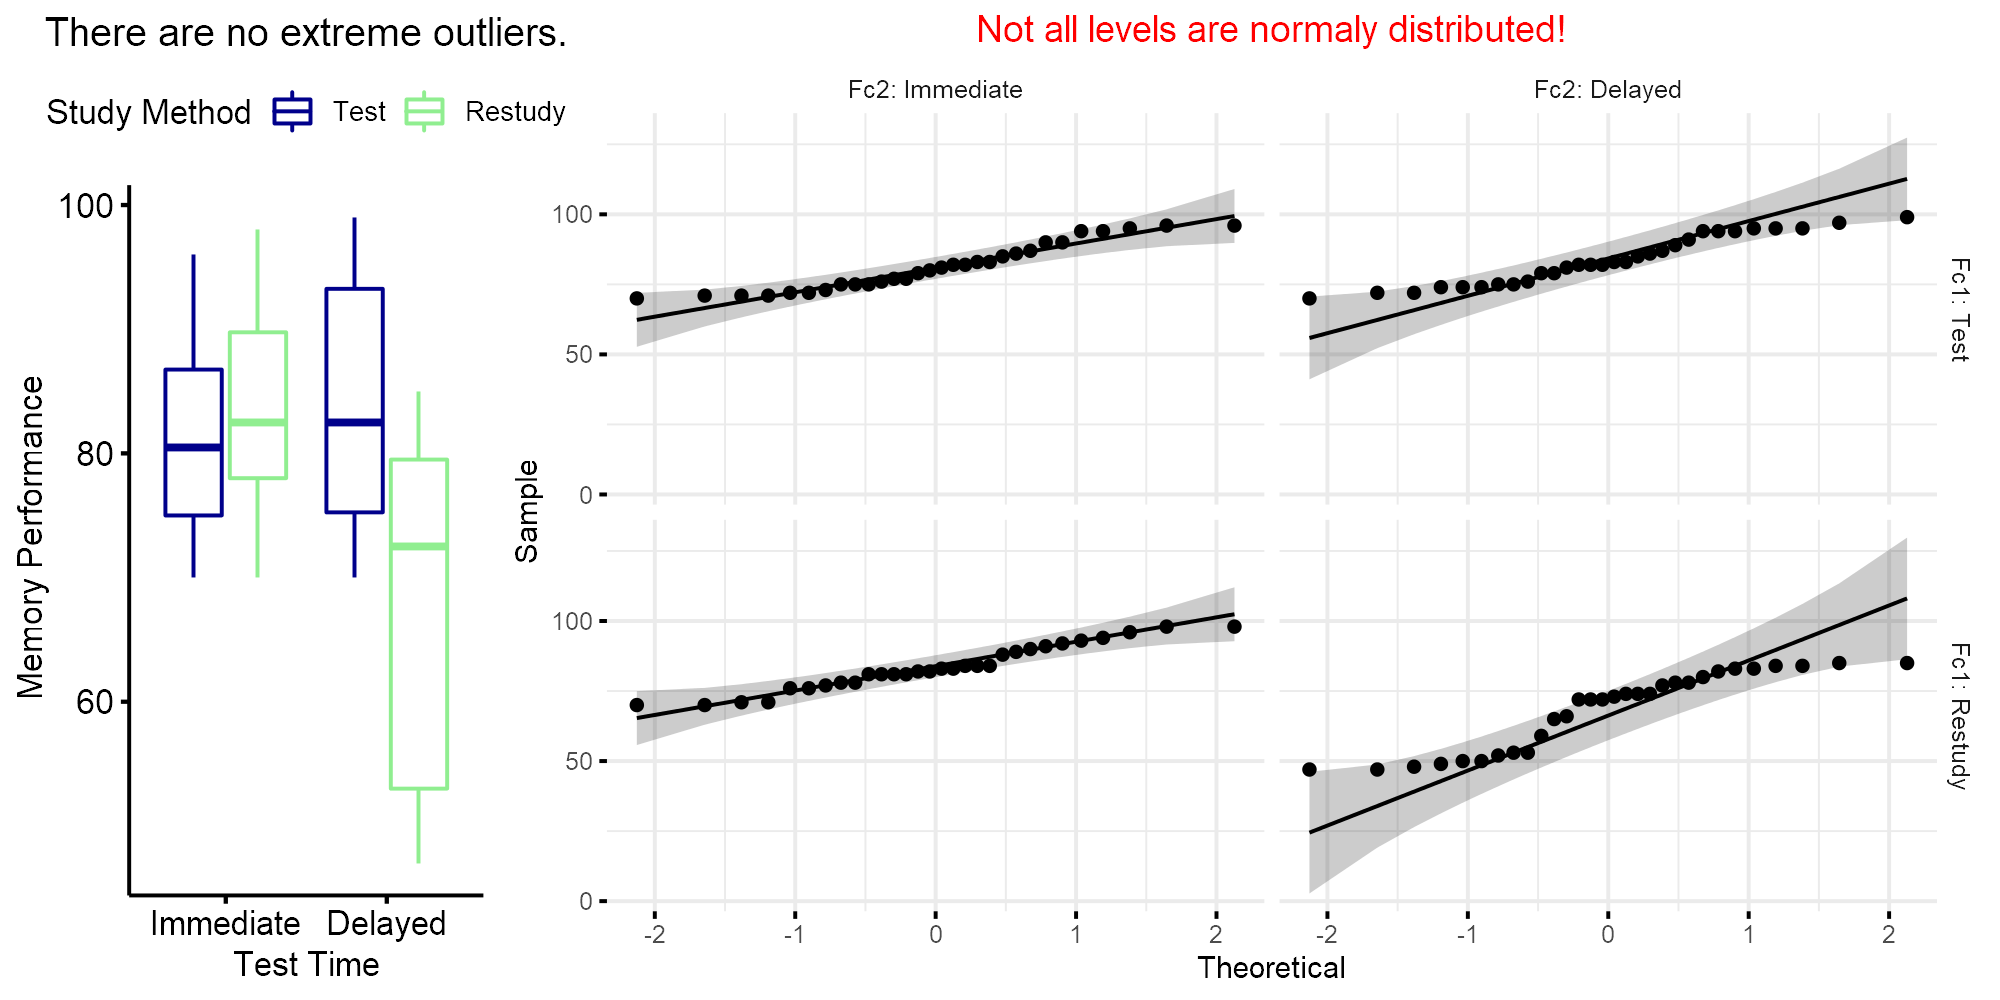

In [26]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200) # change plot size

results$plot.assumption.checks

### Results plot (with extras)

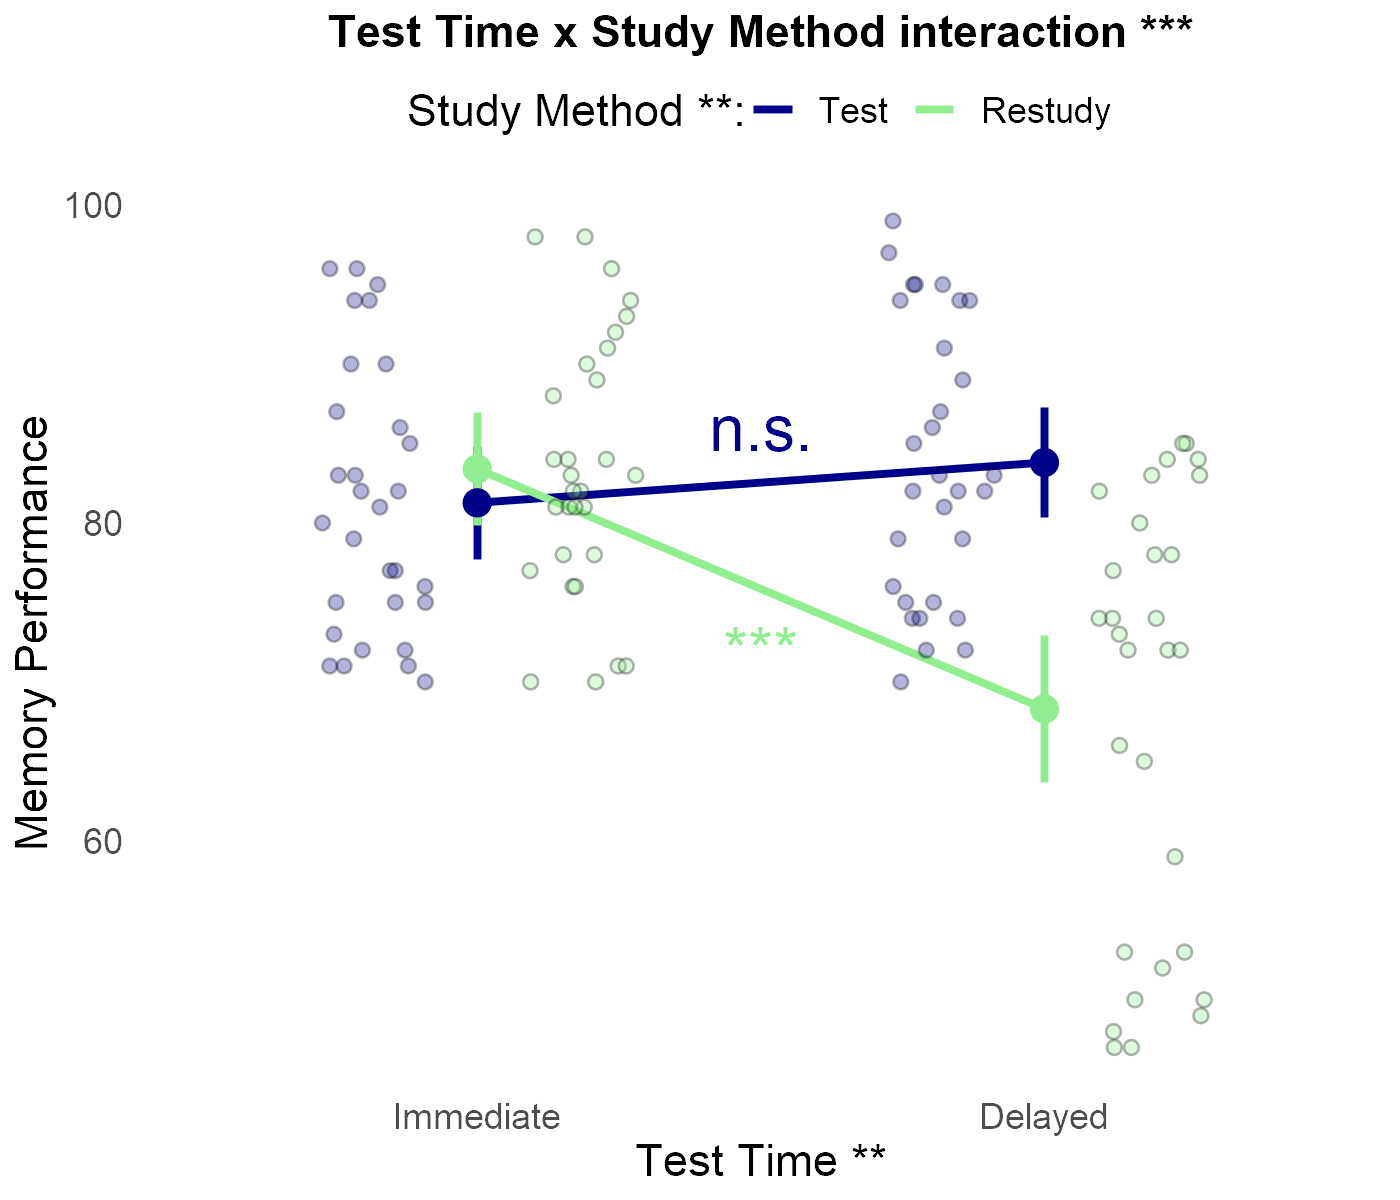

In [27]:
options(repr.plot.width = 7, repr.plot.height = 6, repr.plot.res = 200) # change plot size
# Adding post-hoc comparison stars
# Prepare the values

# post-hoc pairwise comparisons for each Fc1 level between the Fc2 levels
p.Fc1.L1 <-
  ifelse(results$pwc1$p[1] < 0.05, stars.pval(results$pwc1$p[1]), "n.s.")
p.Fc1.L2 <-
  ifelse(results$pwc1$p[2] < 0.05, stars.pval(results$pwc1$p[2]), "n.s.")

results$plot.anova +
  
  # Add post-hoc pairwise comparisons
  # might need to adjust the x and y positions
  annotate(
    "text",
    x = 1.5,
    y = 86,
    label = p.Fc1.L1,
    color = param$cat.color[1],
    size = 8
  ) +
  annotate(
    "text",
    x = 1.5,
    y = 72,
    label = p.Fc1.L2,
    color = param$cat.color[2],
    size = 8
  ) +
  
  # add individual datapoints
  geom_point(
    colour = "black",
    alpha = .3,
    aes(fill = Fc1),
    size = 2,
    stroke = 0.5,
    shape = 21,
    position = position_jitterdodge(),
    show.legend = FALSE
  ) 